## EDA

In [20]:
# train_dataset을 불러오고 싶은 경우
from datasets import load_from_disk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
dataset = load_from_disk("/opt/ml/input/data/train_dataset/train/")
valid_dataset = load_from_disk("/opt/ml/input/data/train_dataset/validation/")
print(dataset)
print(valid_dataset)

Dataset({
    features: ['__index_level_0__', 'answers', 'context', 'document_id', 'id', 'question', 'title'],
    num_rows: 3952
})
Dataset({
    features: ['__index_level_0__', 'answers', 'context', 'document_id', 'id', 'question', 'title'],
    num_rows: 240
})


In [21]:
len(dataset)

3952

In [22]:
def make_pandas(json_file) :
    id_list,doc_list, title_list ,context_list, question_list, answer_start_list,answer_text_list = [],[],[],[],[],[],[]
    for i in range(len(dataset)) :
        id_list.append(json_file[i]['id'])
        doc_list.append(json_file[i]['document_id'])
        title_list.append(json_file[i]['title'])
        context_list.append(json_file[i]['context'])
        question_list.append(json_file[i]['question'])
        answer_start_list.append(json_file[i]['answers']['answer_start'][0])
        answer_text_list.append(json_file[i]['answers']['text'][0])

    new_df = pd.DataFrame({"id" : id_list, 'document_id':doc_list, "title" : title_list, "context" : context_list, "question" : question_list, "answer_start" : answer_start_list,"answer_text" : answer_text_list})
    return new_df

In [23]:
df = make_pandas(dataset)

In [24]:
df.head()

,id,document_id,title,context,question,answer_start,answer_text
0,mrc-1-000067,18293,미국 상원,미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국...,대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?,235,하원
1,mrc-0-004397,51638,인사조직관리,'근대적 경영학' 또는 '고전적 경영학'에서 현대적 경영학으로 전환되는 시기는 19...,현대적 인사조직관리의 시발점이 된 책은?,212,《경영의 실제》
2,mrc-1-000362,5028,강희제,강희제는 강화된 황권으로 거의 황제 중심의 독단적으로 나라를 이끌어 갔기에 자칫 전...,강희제가 1717년에 쓴 글은 누구를 위해 쓰여졌는가?,510,백성
3,mrc-0-001510,34146,금동삼존불감,"불상을 모시기 위해 나무나 돌, 쇠 등을 깎아 일반적인 건축물보다 작은 규모로 만든...",11~12세기에 제작된 본존불은 보통 어떤 나라의 특징이 전파되었나요?,625,중국
4,mrc-0-000823,47334,계사명 사리구,동아대학교박물관에서 소장하고 있는 계사명 사리구는 총 4개의 용기로 구성된 조선후기...,명문이 적힌 유물을 구성하는 그릇의 총 개수는?,30,4개


In [25]:
# 결측치 x
df.isnull().sum()

id              0
document_id     0
title           0
context         0
question        0
answer_start    0
answer_text     0
dtype: int64

In [ ]:
# 중복 x
df.duplicated

In [26]:
df['answer_start']

0       235
1       212
2       510
3       625
4        30
       ... 
3947    317
3948    616
3949    255
3950    476
3951    189
Name: answer_start, Length: 3952, dtype: int64

In [27]:
# histgraph 그리기
def make_hist(data,graph_name) :
    plt.figure(figsize = (10,5))
    data.hist(bins = 50)
    plt.title(f'{graph_name} histogram')
    plt.show()

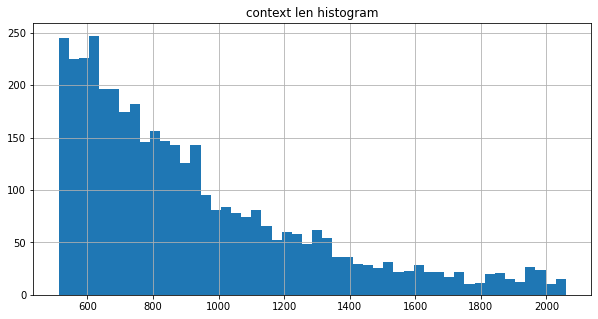

In [28]:
# context 길이 분포
df['len_context']= df.context.apply(lambda x : len(x))
make_hist(df.len_context, 'context len')

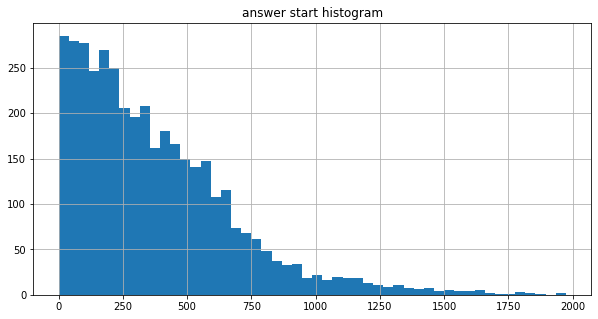

In [29]:
# 정답이 시작하는 위치 분포
make_hist(df['answer_start'],'answer start')

In [1]:
from transformers import AutoTokenizer
from ipywidgets import FloatProgress
from tqdm.notebook import trange

model_name = "klue/bert-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
